### DESCRIPTION:
Расчет 2d модели для одного блока. Интерфейс jupyter к /domainmodel/criminal/mini_solver. Использует:
```
criminal/mini_solver/main.py
criminal/state.py
criminal/notebooks_src/frontend.py
```
Также mini_solver можно тестировать:
```
hybriddomain$: python3 -m domainmodel.criminal.state
   или
hybriddomain$: python3 -m domainmodel.criminal.test_mini_solver
   или
hybriddomain/domainmodel/mini_solver$: python3 main.py

Во всех есть параметер cuda в 
     __name__ == '__main__'
        
```

Сгенерированные исходники лежат в:
```
для с++:
mini_solver/cpp/kernels.cpp
mini_solver/cpp/includes/core.h
mini_solver/cpp/solver.cpp

для cuda:
mini_solver/cuda/core.cu
```

Шаблоны в `templates/mini_solver`

##### Требования:
ipywidgets [1]:
```
$:pip3 install ipywidgets
$:sudo jupyter nbextension enable --py widgetsnbextension
```
##### Использование:
1. Go to hybriddomain folder
2. Run jupyter:
```
hybriddomain$:jupyter notebook
```
3. Open notebook_mini_solver.ipynb

4. click at `Cell/Run All` or load each cell use `Shift+Enter`

##### Важно:
1. Если widgets не работают то надо остановить сервер и выполнить:
```
$: sudo jupyter nbextension enable --py --sys-prefix widgetsnbextension 
```
Если это не поможет, то надо удалить все из папки home/user/.local/share/jupyter

2. Работает только для моделей json с 1 блоком из папки tests/2dTests/
3. Только для 2d моделей
4. Блок в модели должен иметь
```
b.defaultBound     b.defaultEquation  b.defaultInitial
```
5. Границы блока - только Дирихле значения (из за проблем с вершинами)
6. ITERATION_COUNT и ITERATION_STEP должны быть степенями 2. Это связано с обмена result/source через tmp в solver. И второе делит первое. 
6. COUNT_OF_DELAY = 1 так что пока без задержек по времени. 
6. Не проверяется ошибка при пересечении bounds or equations регионов
7. Обязательно нажать `set model` на первом слайде

##### Возможности:
1. Можно тестировать 2d модели для одного блока
2. Используя cuda и без
3. Добавльять регионы уравнений и границ
4. Визуализировать регионы блока
4. Добавлять ядра на c++ или wolfram
5. Итрерактивно смотреть эволюцию процесса

### REFERENCES:
1. [1] http://ipywidgets.readthedocs.io/en/stable/user_install.html

In [1]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed
from IPython.display import display,Math,clear_output
#import test 
#import sympy
# import src.lagrange as lg
import matplotlib.pyplot as plt
from numpy import linspace,sin,shape
from pandas import DataFrame
from IPython.display import HTML

import os
from importlib import reload

# import domainmodel.criminal.test_mini_solver as ts
import domainmodel.criminal.state as st
from domainmodel.criminal.notebooks_src.frontend import FrontState
import sys
sys.path

import widgetsnbextension;
print("widgetsnbextension:")
print(widgetsnbextension.__version__)
print(widgetsnbextension.__file__)
print()
print("ipywidgets:")
print(widgets.__version__)
print(widgets.__file__)

widgetsnbextension:
1.2.6
/home/valdecar/anaconda3/lib/python3.6/site-packages/widgetsnbextension/__init__.py

ipywidgets:
5.2.2
/home/valdecar/anaconda3/lib/python3.6/site-packages/ipywidgets/__init__.py


In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
     $('div.input').hide();
 } else {
     $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''') 

In [3]:
lName = widgets.Label(value=r'simple solver test:')
bTest = widgets.Button(description="run test")
node = widgets.Box(children=[lName, bTest])

def on_button_bTest(event):
    clear_output()
    
    state = st.State()
    modelFile = "tests/2dTests/test2d_for_intervals_single.json"

    # FOR generate solver data:
    state = st.State()
    state.get_model(modelFile)
    state.set_params()
    # state.plot_block()
    state.parse_equations_w()
    state.gen_src_files()
    state.prepare_to_solver()
    state.save_to_file()
    clear_output()
    # END FOR

    # FOR run solver from shell
    # state.load_from_file()
    state.run_solver_shell()
    # END FOR

    # FOR print result
    state.load_from_file()

    '''
    # normalize:
    result = state.result/state.result.max()
    result = 256*result
    plt.imshow(result)
    # END FOR
    '''
    state.plot_results()
    
bTest.on_click(on_button_bTest)
display(node)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


## Mini solver

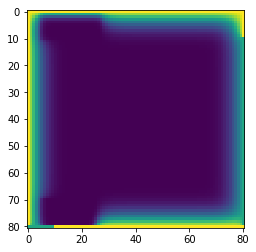

In [4]:
state = st.State()
fState = FrontState(state)
fState.set_callbacks()
fState.show()

##### some widgets examples

In [5]:

def f(x):    
    display(x)
w=interactive(f, x=(0.0,20.0,0.5))

cCuda = widgets.Checkbox(
            value=False,
            description='cuda',
            disabled=False)
b = widgets.Button(description="show cuda")
def f(x):
    display(bool(cCuda.value))
b.on_click(f)
mNode = widgets.Box(children=[w,cCuda,b])

# display(mNode.children[0])
display(mNode)
widgets.IntProgress.close


10.0

<function ipywidgets.widgets.widget.Widget.close>

In [6]:
b0 = widgets.Button(description="button 0")
b1 = widgets.Button(description="button 1")
b2 = widgets.Button(description="button 0")
b3 = widgets.Button(description="button 1")
b4 = widgets.Button(description="button 0")
b5 = widgets.Button(description="button 1")
b6 = widgets.Button(description="button 0")
b7 = widgets.Button(description="button 1")


box_layout = widgets.Layout(display='flex',
                            flex_flow='column',
                            align_items='stretch',
                            border='solid',
                            width='50%')

bNode = widgets.Box(children=[b0, b1, b2, b3, b4, b5, b6, b7], layout=box_layout)

t=widgets.Tab(children=[bNode])
display(t)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [8]:
widgets.Layout

ipywidgets.widgets.widget_layout.Layout